In [2]:
import PIL
import PIL.ImageDraw
import random


In [3]:
class RubkisCube:
    def __init__(self, moves_nr=50):
        self.cube = {"U":[['W', 'W', 'W'], ['W', 'W', 'W'], ['W', 'W', 'W']],
            "L":[['O', 'O', 'O'], ['O', 'O', 'O'], ['O', 'O', 'O']],
            "F":[['G', 'G', 'G'], ['G', 'G', 'G'], ['G', 'G', 'G']],
            "R":[['R', 'R', 'R'], ['R', 'R', 'R'], ['R', 'R', 'R']],
            "B":[['B', 'B', 'B'], ['B', 'B', 'B'], ['B', 'B', 'B']],
            "D":[['Y', 'Y', 'Y'], ['Y', 'Y', 'Y'], ['Y', 'Y', 'Y']]
        }
        self.shuffle(moves_nr)
        
    def __str__(self):
        string = ""
        for face in self.cube.values():
            for row in face:
                for square in row:
                    string+=square
        return string
    '''
    def get_color(self, color: str):
        match color:
            case "R":
                return (255,0,0)
            case "G":
                return (0,255,0)
            case "B":
                return (0,0,255)
            case "W":
                return (255,255,255)
            case "Y":
                return (255,255,0)
            case "O":
                return (255,128,0)
    '''
    def get_color(self, color: str):
        if color == "R":
            return (255,0,0)
        elif color == "G":
            return (0,255,0)
        elif color == "B":
            return (0,0,255)
        elif color == "W":
            return (255,255,255)
        elif color == "Y":
            return (255,255,0)
        elif color == "O":
            return (255,128,0)
             
    def draw_cube(self):
        square_size = 50
        im = PIL.Image.new(mode="RGB", size=(square_size*12,square_size*9))
        draw = PIL.ImageDraw.Draw(im)

        positions = {
            "U": (3, 0),
            "L": (0, 3),
            "F": (3, 3),
            "R": (6, 3),
            "B": (9, 3),
            "D": (3, 6) 
        }

        for side, pos in positions.items():
            base_x, base_y = pos[0] * square_size, pos[1] * square_size
            
            for row in range(3):
                for col in range(3):
                    color = self.get_color(self.cube[side][row][col])

                    x1 = base_x + (col * square_size)
                    y1 = base_y + (row * square_size)
                    x2 = x1 + square_size
                    y2 = y1 + square_size
                    
                    draw.rectangle(
                        xy=(x1, y1, x2, y2),
                        fill=color,
                        outline=(0, 0, 0)
                    )
        #im.show()
        return im
    
    def rotate(self, move: str):
        face = move[0]
        direction = "CCW" if "'" in move else "CW"
        
        old_face = [row[:] for row in self.cube[face]]
        for i in range(3):
            for j in range(3):
                if direction == "CW":
                    self.cube[face][j][2-i] = old_face[i][j]
                elif direction == "CCW":
                    self.cube[face][2-j][i] = old_face[i][j]

        if face == "U":
            if direction == "CW":
                temp = self.cube["L"][0][:]
                self.cube["L"][0] = self.cube["F"][0][:]
                self.cube["F"][0] = self.cube["R"][0][:]
                self.cube["R"][0] = self.cube["B"][0][:]
                self.cube["B"][0] = temp
            elif direction == "CCW":
                temp = self.cube["L"][0][:]
                self.cube["L"][0] = self.cube["B"][0][:]
                self.cube["B"][0] = self.cube["R"][0][:]
                self.cube["R"][0] = self.cube["F"][0][:]
                self.cube["F"][0] = temp

        elif face == "D":
            if direction == "CW":
                temp = self.cube["L"][2][:]
                self.cube["L"][2] = self.cube["B"][2][:]
                self.cube["B"][2] = self.cube["R"][2][:]
                self.cube["R"][2] = self.cube["F"][2][:]
                self.cube["F"][2] = temp
            elif direction == "CCW":
                temp = self.cube["L"][2][:]
                self.cube["L"][2] = self.cube["F"][2][:]
                self.cube["F"][2] = self.cube["R"][2][:]
                self.cube["R"][2] = self.cube["B"][2][:]
                self.cube["B"][2] = temp

        elif face == "F":
            if direction == "CW":
                temp = self.cube["U"][2][:]
                self.cube["U"][2] = [self.cube["L"][2][2], self.cube["L"][1][2], self.cube["L"][0][2]]
                self.cube["L"][0][2], self.cube["L"][1][2], self.cube["L"][2][2] = self.cube["D"][0][:]
                self.cube["D"][0] = [self.cube["R"][2][0], self.cube["R"][1][0], self.cube["R"][0][0]]
                self.cube["R"][0][0], self.cube["R"][1][0], self.cube["R"][2][0] = temp
            elif direction == "CCW":
                temp = self.cube["U"][2][:]
                self.cube["U"][2] = [self.cube["R"][0][0], self.cube["R"][1][0], self.cube["R"][2][0]]
                self.cube["R"][0][0], self.cube["R"][1][0], self.cube["R"][2][0] = self.cube["D"][0][::-1]
                self.cube["D"][0] = [self.cube["L"][0][2], self.cube["L"][1][2], self.cube["L"][2][2]]
                self.cube["L"][0][2], self.cube["L"][1][2], self.cube["L"][2][2] = temp[::-1]

        elif face == "B":
            if direction == "CW":
                temp = self.cube["U"][0][:]
                self.cube["U"][0] = [self.cube["R"][0][2], self.cube["R"][1][2], self.cube["R"][2][2]]
                self.cube["R"][0][2], self.cube["R"][1][2], self.cube["R"][2][2] = self.cube["D"][2][::-1]
                self.cube["D"][2] = [self.cube["L"][0][0], self.cube["L"][1][0], self.cube["L"][2][0]]
                self.cube["L"][0][0], self.cube["L"][1][0], self.cube["L"][2][0] = temp[::-1]
            elif direction == "CCW":
                temp = self.cube["U"][0][:]
                self.cube["U"][0] = [self.cube["L"][2][0], self.cube["L"][1][0], self.cube["L"][0][0]]
                self.cube["L"][0][0], self.cube["L"][1][0], self.cube["L"][2][0] = self.cube["D"][2][:]
                self.cube["D"][2] = [self.cube["R"][2][2], self.cube["R"][1][2], self.cube["R"][0][2]]
                self.cube["R"][0][2], self.cube["R"][1][2], self.cube["R"][2][2] = temp

        elif face == "L":
            if direction == "CW":
                temp = [self.cube["U"][i][0] for i in range(3)]
                for i in range(3): self.cube["U"][i][0] = self.cube["B"][2-i][2]
                for i in range(3): self.cube["B"][i][2] = self.cube["D"][2-i][0]
                for i in range(3): self.cube["D"][i][0] = self.cube["F"][i][0]
                for i in range(3): self.cube["F"][i][0] = temp[i]
            elif direction == "CCW":
                temp = [self.cube["U"][i][0] for i in range(3)]
                for i in range(3): self.cube["U"][i][0] = self.cube["F"][i][0]
                for i in range(3): self.cube["F"][i][0] = self.cube["D"][i][0]
                for i in range(3): self.cube["D"][i][0] = self.cube["B"][2-i][2]
                for i in range(3): self.cube["B"][i][2] = temp[2-i]

        elif face == "R":
            if direction == "CW":
                temp = [self.cube["U"][i][2] for i in range(3)]
                for i in range(3): self.cube["U"][i][2] = self.cube["F"][i][2]
                for i in range(3): self.cube["F"][i][2] = self.cube["D"][i][2]
                for i in range(3): self.cube["D"][i][2] = self.cube["B"][2-i][0]
                for i in range(3): self.cube["B"][i][0] = temp[2-i]
            elif direction == "CCW":
                temp = [self.cube["U"][i][2] for i in range(3)]
                for i in range(3): self.cube["U"][i][2] = self.cube["B"][2-i][0]
                for i in range(3): self.cube["B"][i][0] = self.cube["D"][2-i][2]
                for i in range(3): self.cube["D"][i][2] = self.cube["F"][i][2]
                for i in range(3): self.cube["F"][i][2] = temp[i]

    def shuffle(self, moves=50):
        for _ in range(moves):
            move = random.choice(["F","R","U","B","L","D","F'","R'","U'","B'","L'","D'"])
            self.rotate(move)
        return self
    
    def check_score(self):
        return sum(sum(row.count(face[1][1]) for row in face) for face in self.cube.values())
    
    def check_done(self):
        return self.check_score() == 54
    
    def step(self, action):
        move = ["F","R","U","B","L","D","F'","R'","U'","B'","L'","D'"][action]
        self.rotate(move)
        reward = 200 if self.check_score()==54 else (self.check_score()-54)/10
        return reward
    

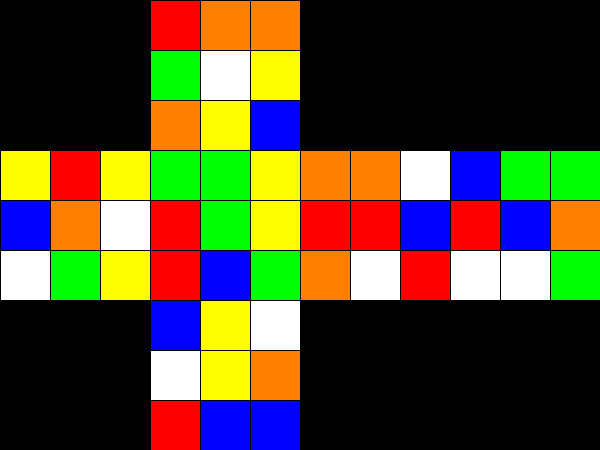

In [4]:
cub = RubkisCube()
#temp.shuffle()
cub.draw_cube()

# Test random environment

In [5]:
episodes = 1
for episode in range(episodes):
    temp = RubkisCube()
    done = temp.check_done()
    score = 0
    
    for _ in range(50):
        action = random.randint(0,11)
        score += temp.step(action)
        print(score)
        if temp.check_done():
            break    

-4.2
-8.0
-12.1
-16.2
-20.4
-24.599999999999998
-28.799999999999997
-32.8
-37.0
-41.2
-45.5
-49.5
-53.8
-58.0
-62.2
-66.4
-70.60000000000001
-74.7
-78.8
-83.1
-87.39999999999999
-91.89999999999999
-96.1
-100.0
-103.9
-108.10000000000001
-112.30000000000001
-116.4
-120.60000000000001
-124.60000000000001
-129.0
-133.1
-137.29999999999998
-141.39999999999998
-145.29999999999998
-149.39999999999998
-153.49999999999997
-157.89999999999998
-162.09999999999997
-166.39999999999998
-170.59999999999997
-174.89999999999998
-178.79999999999998
-183.1
-187.2
-191.39999999999998
-195.29999999999998
-199.49999999999997
-203.69999999999996
-207.79999999999995


# DL Model

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam 

In [7]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1, states)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [8]:
model = build_model(54, 12)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 54)                0         
                                                                 
 dense (Dense)               (None, 64)                3520      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 12)                780       
                                                                 
Total params: 8,460
Trainable params: 8,460
Non-trainable params: 0
_________________________________________________________________


# Custom Environment

In [9]:
import gym
from gym import Env
from gym.spaces import Discrete, Box, Dict, MultiBinary, MultiDiscrete, Tuple
import numpy as np
import random
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy


# Spaces

In [10]:
Discrete(12).sample()

5

In [11]:
Box(0, 1, shape=(3,3)).sample()

array([[0.47862473, 0.9383407 , 0.3109202 ],
       [0.88125664, 0.41991237, 0.21433873],
       [0.66568404, 0.41875762, 0.27481812]], dtype=float32)

In [12]:
Tuple((Discrete(2), Box(0, 100, shape=(3,)))).sample()

(0, array([21.179289,  8.545828, 32.50802 ], dtype=float32))

In [13]:
Dict({'height': Discrete(2), 'speed': Box(0, 100, shape=(1,))}).sample()

OrderedDict([('height', 1), ('speed', array([35.675358], dtype=float32))])

In [14]:
MultiBinary(4).sample()

array([1, 1, 0, 0], dtype=int8)

In [15]:
MultiDiscrete([5, 2, 2]).sample()

array([3, 1, 1], dtype=int64)

# Building the Environment

In [16]:
class CubeEnv(Env):
    def __init__(self):
        self.action_space = Discrete(12)
        
        self.color_to_idx = {
            'W': 0,  # White
            'O': 1,  # Orange
            'G': 2,  # Green
            'R': 3,  # Red
            'B': 4,  # Blue
            'Y': 5   # Yellow
        }
        self.observation_space = Box(low=0, high=5, shape=(54,), dtype=np.int8)
        
        self.state = RubkisCube()
        self.done = False
        self.score = 0
        
    def _state_to_observation(self):
        state_str = str(self.state)  # You might need to adjust this based on your RubkisCube class
        return np.array([self.color_to_idx[c] for c in state_str], dtype=np.int8)
    
    def step(self, action):
        self.score += self.state.step(action)
        self.done = self.state.check_done()
        
        if self.done:
            reward = 200
        else:
            reward = (self.score-54)/100
            
        info = {}
            
        return self._state_to_observation(), reward, self.done, info
    
    def render(self):
        return self.state.draw_cube()
    
    def reset(self):
        self.state = RubkisCube()
        self.done = False
        self.score = 0
        return self._state_to_observation()

# Test Environment

In [17]:
env_cub = CubeEnv()

In [18]:
episodes = 1
for episode in range(episodes):
    obs = env_cub.reset()
    done = False
    score = 0
    
    for _ in range(50):
        action = env_cub.action_space.sample()
        obs, reward, done, info = env_cub.step(action)
        score += reward
        print(score)
        #env_cub.render().show()
        if done:
            break

-0.583
-1.208
-1.873
-2.578
-3.319
-4.1
-4.923
-5.787
-6.694
-7.6419999999999995
-8.633
-9.665
-10.738999999999999
-11.851999999999999
-13.006999999999998
-14.206999999999997
-15.447999999999997
-16.733999999999998
-18.064
-19.436
-20.85
-22.305
-23.801
-25.336
-26.912
-28.529
-30.186
-31.881
-33.61
-35.377
-37.183
-39.028999999999996
-40.916999999999994
-42.846999999999994
-44.81699999999999
-46.827999999999996
-48.876
-50.961
-53.086999999999996
-55.25299999999999
-57.45899999999999
-59.70499999999999
-61.99199999999999
-64.32199999999999
-66.69299999999998
-69.10499999999999
-71.55699999999999
-74.04899999999999
-76.582
-79.15499999999999


# Train Model

In [21]:
log_path = os.path.join('Training', 'Logs')
model = PPO('MlpPolicy', env_cub, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\RoscaMitrut\.conda\envs\second_env\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [22]:
model.learn(total_timesteps=20000)

Logging to Training\Logs\PPO_2
-----------------------------
| time/              |      |
|    fps             | 432  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 365          |
|    iterations           | 2            |
|    time_elapsed         | 11           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0022646002 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.48        |
|    explained_variance   | 3.19e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 3.19e+05     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0046      |
|    value_loss           | 6.32e+05     |
----------------------------

In [30]:
cube_model_path = os.path.join('Training', 'Saved Models', 'Cube_Model')
model.save(cube_model_path)

In [ ]:
#load
model = PPO.load(cube_model_path, env=env_cub)

In [23]:
evaluate_policy(model, env_cub, n_eval_episodes=10)
#score mean / standard deviation

c:\Users\RoscaMitrut\.conda\envs\second_env\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


KeyboardInterrupt: 